In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
data = pd.read_csv("../data/full_import_dataset/full_import_dataset_with_package.csv")
data.head()

,project_name,import,is_kotlin_import,is_python_import,package
0,2dust#v2rayNG,androidx.appcompat.app.AppCompatActivity,1,0,androidx.appcompat.app
1,InsertKoinIO#koin,androidx.appcompat.app.AppCompatActivity,1,0,androidx.appcompat.app
2,InsertKoinIO#koin,androidx.appcompat.app.AppCompatActivity,1,0,androidx.appcompat.app
3,InsertKoinIO#koin,androidx.appcompat.app.AppCompatActivity,1,0,androidx.appcompat.app
4,InsertKoinIO#koin,androidx.appcompat.app.AppCompatActivity,1,0,androidx.appcompat.app


# **Number of unique projects**

In [3]:
data["project_name"].nunique()

2836

# **Imports in a project**

**Top 5 by the number of imports in the project**

In [4]:
data_project_import = data.groupby(['project_name'], axis =0)

In [5]:
data_project_import_count = data_project_import["import"].count().reset_index(name="import_count").sort_values(by=['import_count'], ascending=False)
data_project_import_count_top_5 = data_project_import_count.head(5)
data_project_import_count_top_5

,project_name,import_count
2053,mozilla-mobile#fenix,24474
878,blockchain#My-Wallet-V3-Android,11162
2762,wordpress-mobile#WordPress-Android,10608
295,JetBrains#compose-jb,7964
1587,intellij-rust#intellij-rust,7565


<AxesSubplot:title={'center':'Dependence of the number of imports on projects'}, xlabel='project_name'>

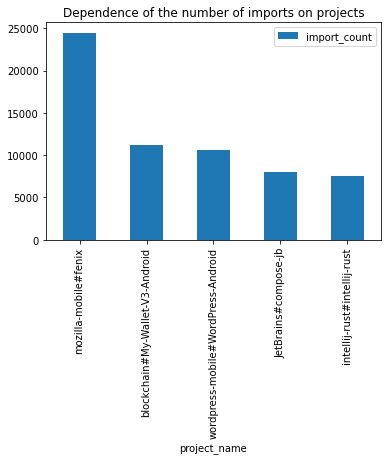

In [6]:
import matplotlib.pyplot as plt
data_project_import_count_top_5.plot.bar(x ='project_name', y='import_count', title='Dependence of the number of imports on projects')

**Average number of imports per project**

In [7]:
mean_import = data_project_import_count["import_count"].mean()
mean_import

187.99576868829337

**Median number of imports per project**

In [8]:
median_import = data_project_import_count["import_count"].median()
median_import

43.0

In [9]:
data_project_import_and_count_kotlin = data.groupby(['project_name','is_kotlin_import'], axis =0)['is_kotlin_import'].sum().reset_index(name="kotlin_import_count").sort_values(by=['kotlin_import_count'], ascending=False)
data_project_import_and_count_kotlin.head(5)

,project_name,is_kotlin_import,kotlin_import_count
2064,mozilla-mobile#fenix,1,24390
884,blockchain#My-Wallet-V3-Android,1,11162
2777,wordpress-mobile#WordPress-Android,1,10604
295,JetBrains#compose-jb,1,7964
1596,intellij-rust#intellij-rust,1,7520


In [10]:
data_project_import_and_count_python = data.groupby(['project_name','is_python_import'], axis =0)['is_python_import'].sum().reset_index(name="python_import_count").sort_values(by=['python_import_count'], ascending=False)
data_project_import_and_count_python.head(5)

,project_name,is_python_import,python_import_count
1468,gtalarico#ironpython-stubs,1,4060
1522,home-assistant#core,1,3337
1177,doableware#djongo,1,3226
2387,ray-project#ray,1,2971
1727,jumpserver#jumpserver,1,2706


# **Package**

In [11]:
data_project_package = data.groupby(['project_name','package'], axis =0)["package"].count().reset_index(name="package_count")
data_project_package.head(100)

,project_name,package,package_count
0,01joy#news-search-engine,bs4,1
1,01joy#news-search-engine,datetime,2
2,01joy#news-search-engine,flask.Flask,1
3,01joy#news-search-engine,flask.render_template,1
4,01joy#news-search-engine,flask.request,1
...,...,...,...
95,1adrianb#face-alignment,skimage.io,1
96,1adrianb#face-alignment,torch.hub,4
97,1adrianb#face-alignment,torch.nn,2
98,1adrianb#face-alignment,torch.utils.model_zoo,1


In [12]:
data_package = data_project_package.groupby('project_name')['package_count'].count().reset_index(name="package_count").sort_values(by=['package_count'], ascending=False)
data_package_top_5 = data_package.head(5)
data_package_top_5.head()

,project_name,package_count
787,apache#airflow,315
2374,ray-project#ray,266
1514,home-assistant#core,248
2449,saltstack#salt,240
1389,getsentry#sentry,229


<AxesSubplot:title={'center':'Dependence of the number of packages on projects'}, xlabel='project_name'>

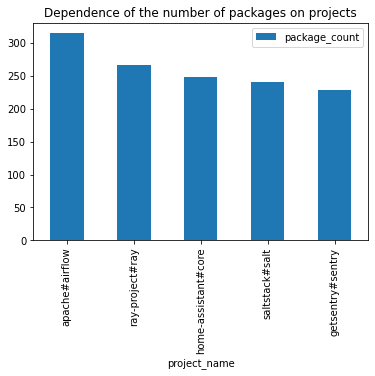

In [13]:
data_package_top_5.plot.bar(x ='project_name', y='package_count', title='Dependence of the number of packages on projects')

**Average number of packages per project**

In [14]:
mean_package = data_package["package_count"].mean()
mean_package

28.238011283497883

**Median number of imports per project**

In [15]:
median_package = data_package["package_count"].median()
median_package

18.0